In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
train = pd.read_csv('Train.csv', index_col = 'date_time')
test = pd.read_csv('Test.csv', index_col = 'date_time')
sub_format = pd.read_csv('sample_submission.csv')

In [71]:
test2 = test[['is_holiday', 'air_pollution_index', 'humidity', 'wind_speed',
       'wind_direction', 'visibility_in_miles', 'dew_point', 'temperature',
       'rain_p_h', 'snow_p_h', 'clouds_all']]

In [108]:
train.columns

Index(['is_holiday', 'air_pollution_index', 'humidity', 'wind_speed',
       'wind_direction', 'visibility_in_miles', 'dew_point', 'temperature',
       'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume'],
      dtype='object')

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14454 entries, 0 to 14453
Data columns (total 14 columns):
date_time              14454 non-null object
is_holiday             14454 non-null object
air_pollution_index    14454 non-null int64
humidity               14454 non-null int64
wind_speed             14454 non-null int64
wind_direction         14454 non-null int64
visibility_in_miles    14454 non-null int64
dew_point              14454 non-null int64
temperature            14454 non-null float64
rain_p_h               14454 non-null float64
snow_p_h               14454 non-null int64
clouds_all             14454 non-null int64
weather_type           14454 non-null object
weather_description    14454 non-null object
dtypes: float64(2), int64(8), object(4)
memory usage: 1.5+ MB


In [136]:
dummies1 = pd.get_dummies(train['weather_type'])
dummies2 = pd.get_dummies(train['weather_description'])

In [137]:
train_new1 = pd.concat([train,dummies1], axis='columns')
train_new = pd.concat([train_new1,dummies2], axis = 'columns')

In [168]:
train_new = train_new.drop(['weather_type','weather_description','very heavy rain','Squall','SQUALLS'], axis='columns')

KeyError: "['weather_type' 'weather_description' 'very heavy rain'] not found in axis"

In [161]:
train_new.columns

Index(['is_holiday', 'air_pollution_index', 'humidity', 'wind_speed',
       'wind_direction', 'visibility_in_miles', 'dew_point', 'temperature',
       'rain_p_h', 'snow_p_h', 'clouds_all', 'traffic_volume', 'Clear',
       'Clouds', 'Drizzle', 'Fog', 'Haze', 'Mist', 'Rain', 'Smoke', 'Snow',
       'Squall', 'Thunderstorm', 'SQUALLS', 'Sky is Clear', 'broken clouds',
       'drizzle', 'few clouds', 'fog', 'freezing rain', 'haze',
       'heavy intensity drizzle', 'heavy intensity rain', 'heavy snow',
       'light intensity drizzle', 'light intensity shower rain', 'light rain',
       'light rain and snow', 'light shower snow', 'light snow', 'mist',
       'moderate rain', 'overcast clouds', 'proximity shower rain',
       'proximity thunderstorm', 'proximity thunderstorm with drizzle',
       'proximity thunderstorm with rain', 'scattered clouds',
       'shower drizzle', 'shower snow', 'sky is clear', 'sleet', 'smoke',
       'snow', 'thunderstorm', 'thunderstorm with drizzle',
    

In [162]:
train.shape

(33750, 14)

In [163]:
dummies3 = pd.get_dummies(test['weather_type'])
dummies4 = pd.get_dummies(test['weather_description'])
test_new1 = pd.concat([test,dummies3], axis='columns')
test_new = pd.concat([test_new1,dummies4], axis = 'columns')
test_new = test_new.drop(['weather_type','weather_description'], axis='columns')

In [164]:
test_new.columns

Index(['is_holiday', 'air_pollution_index', 'humidity', 'wind_speed',
       'wind_direction', 'visibility_in_miles', 'dew_point', 'temperature',
       'rain_p_h', 'snow_p_h', 'clouds_all', 'Clear', 'Clouds', 'Drizzle',
       'Fog', 'Haze', 'Mist', 'Rain', 'Smoke', 'Snow', 'Thunderstorm',
       'Sky is Clear', 'broken clouds', 'drizzle', 'few clouds', 'fog', 'haze',
       'heavy intensity drizzle', 'heavy intensity rain', 'heavy snow',
       'light intensity drizzle', 'light intensity shower rain', 'light rain',
       'light shower snow', 'light snow', 'mist', 'moderate rain',
       'overcast clouds', 'proximity shower rain', 'proximity thunderstorm',
       'proximity thunderstorm with drizzle',
       'proximity thunderstorm with rain', 'scattered clouds',
       'shower drizzle', 'sky is clear', 'sleet', 'smoke', 'snow',
       'thunderstorm', 'thunderstorm with heavy rain',
       'thunderstorm with light drizzle', 'thunderstorm with light rain',
       'thunderstorm with ra

In [165]:
test.shape

(14454, 13)

In [166]:
for i in train_new['is_holiday']:
    if i == 'None':
        train_new['is_holiday'] = 0
    else:
        train_new['is_holiday'] = 1

In [119]:
for i in test_new['is_holiday']:
    if i == 'None':
        test_new['is_holiday'] = 0
    else:
        test_new['is_holiday'] = 1

In [141]:
X = train_new[['is_holiday', 'air_pollution_index', 'humidity', 'wind_speed',
       'wind_direction', 'visibility_in_miles', 'dew_point', 'temperature',
       'rain_p_h', 'snow_p_h', 'clouds_all', 'traffic_volume', 'Clear',
       'Clouds', 'Drizzle', 'Fog', 'Haze', 'Mist', 'Rain', 'Smoke', 'Snow',
       'Squall', 'Thunderstorm', 'SQUALLS', 'Sky is Clear', 'broken clouds',
       'drizzle', 'few clouds', 'fog', 'freezing rain', 'haze',
       'heavy intensity drizzle', 'heavy intensity rain', 'heavy snow',
       'light intensity drizzle', 'light intensity shower rain', 'light rain',
       'light rain and snow', 'light shower snow', 'light snow', 'mist',
       'moderate rain', 'overcast clouds', 'proximity shower rain',
       'proximity thunderstorm', 'proximity thunderstorm with drizzle',
       'proximity thunderstorm with rain', 'scattered clouds',
       'shower drizzle', 'shower snow', 'sky is clear', 'sleet', 'smoke',
       'snow', 'thunderstorm', 'thunderstorm with drizzle',
       'thunderstorm with heavy rain', 'thunderstorm with light drizzle',
       'thunderstorm with light rain', 'thunderstorm with rain']]

In [142]:
y = train_new['traffic_volume']

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
lm = LinearRegression()

In [147]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
Predicted_Y = lm.predict(X_test)

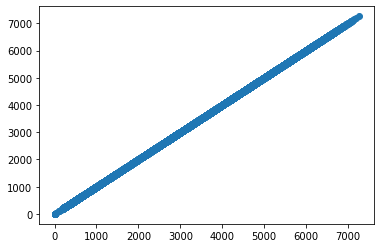

In [149]:
plt.scatter(y_test, Predicted_Y)

In [150]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, Predicted_Y))
print(rmse)

8.4195812683547e-12


In [151]:
Predicted_test = lm.predict(test_new)

ValueError: shapes (14454,53) and (60,) not aligned: 53 (dim 1) != 60 (dim 0)

In [33]:
sub_format.columns

Index(['date_time', 'traffic_volume'], dtype='object')

In [93]:
Submission1 = []
Submission1 = pd.DataFrame(Submission1)
Submission1['date_time'] = test_n.index
Submission1['traffic_volume'] = Predicted_test
Submission1.to_csv('Sample1.csv')

In [152]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, random_state=20)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=20, verbose=0,
                      warm_start=False)

In [155]:
Predicted_Y2 = rf.predict(X_test)

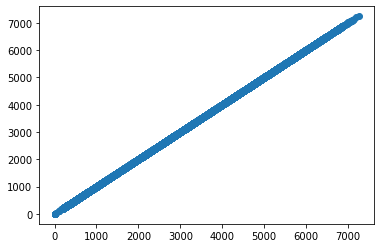

In [156]:
plt.scatter(y_test, Predicted_Y2)

In [157]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, Predicted_Y2))
print(rmse)

0.5868811874626157


In [158]:
Predicted_test2 = rf.predict(test2)

ValueError: Number of features of the model must match the input. Model n_features is 60 and input n_features is 11 

In [100]:
Submission2 = []
Submission2 = pd.DataFrame(Submission2)
Submission2['date_time'] = test2.index
Submission2['traffic_volume'] = Predicted_test2
Submission2.to_csv('Sample2.csv')

In [101]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [103]:
Predicted_Y3 = gb.predict(X_test)

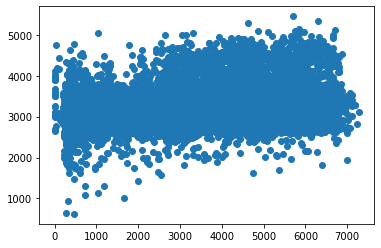

In [104]:
plt.scatter(y_test, Predicted_Y3)

In [105]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, Predicted_Y3))
print(rmse)

1926.8072867066835


In [106]:
Predicted_test3 = gb.predict(test2)

In [107]:
Submission3 = []
Submission3 = pd.DataFrame(Submission3)
Submission3['date_time'] = test2.index
Submission3['traffic_volume'] = Predicted_test3
Submission3.to_csv('Sample3.csv')